In [17]:
# import
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [19]:
# get the price action for Procter & Gamble (the code is PG)
ticker='PG'
data=pd.DataFrame()
data[ticker]=wb.DataReader(ticker,data_source='yahoo',start='2007-1-1')['Adj Close']

In [20]:
# calculate daily logaritmic returns
log_returns=np.log(1+data.pct_change())

In [64]:
# save the  mean and variance of returns
u=log_returns.mean()
var=log_returns.var()

In [55]:
# calculate the drift
drift=u-(0.5*var)

In [56]:
# calculate the standar deviation of returns
std=log_returns.std()

In [57]:
# set the invervals and iterations
t_intervals=1000 # how many days
iterations=10 #how many distincts simulation

In [58]:
#generete simulation numbers
daily_returns_excepted=np.exp(drift.values+std.values*norm.ppf(np.random.rand(t_intervals,iterations)))

In [59]:
# save the last price
s0=data.iloc[-1]

In [60]:
# make an empty array
price_list=np.zeros_like(daily_returns_excepted)

In [61]:
price_list[0]=s0

In [62]:
# generate the simulated price
for t in range(1,t_intervals):
    price_list[t]=price_list[t-1]*daily_returns_excepted[t]

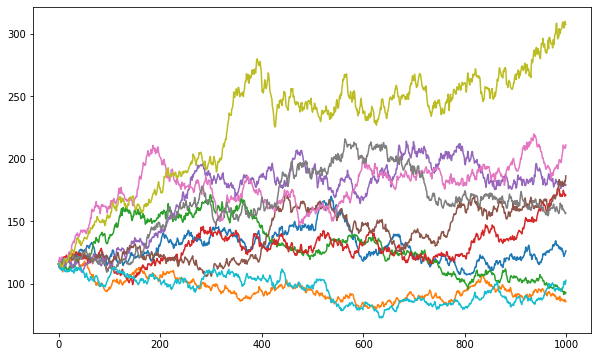

In [63]:
#plot the result
plt.figure(figsize=(10,6))
plt.plot(price_list)